# Make Data Model Ready

In [56]:
train = train.rename(columns={'sex_H': 'female'})
val_set = val_set.rename(columns={'sex_H': 'female'})
test_set = test_set.rename(columns={'sex_H': 'female'})

## Data Processing  
The first problem we identified was: Non-primary and deceased are only 0.2% of the dataset which imbalances the dataset and may not produce significant results, so we decided to drop them.  
In addition to that, since we will be working only with primary customers, the column last_date_primary is not helpful anymore, so we will drop it as well.  

In [57]:
#Dropping rows with primary_cust == 99
train = train[train['primary_cust'] != 99]
test_set = test_set[test_set['primary_cust'] != 99]
val_set = val_set[val_set['primary_cust'] != 99]

print((train['primary_cust'] == 99).value_counts())

primary_cust
False    7336142
Name: count, dtype: int64


Deceased clients have a few products, but they are not going to buy any more products -which is not valuable to our ultimate goal of predicting which products clients will buy, so we will drop the rows of deceased clients and drop the column

In [58]:
#Dropping rows with deceased == 1
# train = train[train['deceased'] == 0]
# test_set = test_set[test_set['deceased'] == 0]
# val_set = val_set[val_set['deceased'] == 0]

print((train['deceased'] == 1).value_counts())
print((test_set['deceased'] == 1).value_counts())
print((val_set['deceased'] == 1).value_counts())

deceased
False    7336142
Name: count, dtype: int64
deceased
False    1571978
Name: count, dtype: int64
deceased
False    1572033
Name: count, dtype: int64


We will drop columns where age is 0 and over 100. We believe these clients are not going to be valuable on our model

In [59]:
print(((train['age'] == 0) | (train['age'] > 100)).value_counts())

age
False    7328925
True        7217
Name: count, dtype: int64


In [60]:
train = train[(train['age'] > 0) & (train['age'] <= 100)]
test_set = test_set[(test_set['age'] > 0) & (test_set['age'] <= 100)]
val_set = val_set[(val_set['age'] > 0) & (val_set['age'] <= 100)]

print(((train['age'] == 0) | (train['age'] > 100)).value_counts())

age
False    7328925
Name: count, dtype: int64


We will drop the rows on column seniority_in_months with values -999999 and null values under province_name (that were previously filled up with 'other') since those variables cause some noise on the data

In [61]:
train = train[train['seniority_in_months'] != -999999]
train = train[train['province_name'] != 'other']

test_set = test_set[test_set['seniority_in_months'] != -999999]
test_set = test_set[test_set['province_name'] != 'other']

val_set = val_set[val_set['seniority_in_months'] != -999999]
val_set = val_set[val_set['province_name'] != 'other']

We had the impression the columns seniority in months and first contract date were giving us the same information and we decided to check the correlation. Turns out it is highly correlated, so we'll keep the column seniority in months.

In [62]:
correlation = train[['seniority_in_months', 'first_contract_date']].corr()
correlation

,seniority_in_months,first_contract_date
seniority_in_months,1.000000,-0.965954
first_contract_date,-0.965954,1.000000


Dropping primary_customer , last_date_primary, deceased and first_contract_date columns since after cleaning the dataset, they do not provide any additional information

In [63]:
train = train.drop(columns=['primary_cust', 'last_date_primary', 'deceased', 'first_contract_date'])
test_set = test_set.drop(columns=['primary_cust', 'last_date_primary', 'deceased', 'first_contract_date'])
val_set = val_set.drop(columns=['primary_cust', 'last_date_primary', 'deceased', 'first_contract_date'])

In [64]:
(train['income'] == 0).value_counts()

income
False    5772084
True     1523888
Name: count, dtype: int64

There is a lot of missing values for the income variable. We checked if it makes sense for us to fill those missing incomes with the median income per province, however we still got too many null values, so we will drop the income = 0 rows

In [65]:
train = train[train['income'] != 0]
test_set = test_set[test_set['income'] != 0]
val_set = val_set[val_set['income'] != 0]

print(train.shape)
print(test_set.shape)
print(val_set.shape)

(5772084, 44)
(1236744, 43)
(1236546, 43)


In [66]:
train.isnull().sum()

date                       0
customer_code              0
employee_index             0
country                    0
female                     0
age                        0
new_cust                   0
seniority_in_months        0
cust_type                  0
cust_relationship          0
residency_spain            0
birth_spain                0
join_channel               0
province_name              0
active_cust                0
income                     0
segment                    0
savings_acct               0
guarantees                 0
current_acct               0
derivada_acct              0
payroll_acct               0
junior_acct                0
mas_particular_acct        0
particular_acct            0
particular_plus_acct       0
short_term_depo            0
medium_term_depo           0
long_term_depo             0
e_acct                     0
funds                      0
mortgage                   0
pension                    0
loans                      0
taxes         

In [67]:
# Checking unique variables for cust_type
print(train['cust_type'].unique())
print(train['cust_type'].isna().sum())

['1' '0' '2' '3' 'P' '4']
0


In [68]:
# Fixing cust_type variables so they are consistent across rows
train['cust_type'] = train['cust_type'].astype(str).str.strip()
cust_type_map = {'0.0': '0', '1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4'}
train['cust_type'] = train['cust_type'].replace(cust_type_map)

test_set['cust_type'] = test_set['cust_type'].astype(str).str.strip()
test_set['cust_type'] = test_set['cust_type'].replace(cust_type_map)

val_set['cust_type'] = val_set['cust_type'].astype(str).str.strip()
val_set['cust_type'] = val_set['cust_type'].replace(cust_type_map)

train['cust_type'] = train['cust_type'].astype(object)
test_set['cust_type'] = test_set['cust_type'].astype(object)
val_set['cust_type'] = val_set['cust_type'].astype(object)

print(train['cust_type'].value_counts())
print(train['cust_relationship'].value_counts())

cust_type
1    5748876
0      22238
3        642
2        165
P        122
4         41
Name: count, dtype: int64
cust_relationship
I    3202187
A    2546854
0      22238
P        683
R        122
Name: count, dtype: int64


In [69]:
train.describe().round(2)
#Check for 0s, outliers - that are too different from the 4th quartile

,date,customer_code,age,new_cust,seniority_in_months,active_cust,income,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct_1,pensions_2,direct_debt,total_products,first_contract_age
count,5772084,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.0,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00,5772084.00
mean,2015-12-16 16:01:43.477912832,811258.77,40.77,0.03,83.32,0.44,134132.78,0.00,0.0,0.62,0.00,0.08,0.01,0.01,0.13,0.04,0.00,0.00,0.04,0.09,0.02,0.01,0.01,0.00,0.06,0.05,0.03,0.00,0.06,0.06,0.13,1.44,33.83
min,2015-06-28 00:00:00,15889.00,2.00,0.00,0.00,0.00,1202.73,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-9.00
25%,2015-09-28 00:00:00,435897.50,25.00,0.00,26.00,0.00,68564.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,22.00
50%,2015-12-28 00:00:00,907045.00,40.00,0.00,54.00,0.00,101606.49,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,30.00
75%,2016-03-28 00:00:00,1180245.00,51.00,0.00,140.00,1.00,155661.81,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,41.00
max,2016-05-28 00:00:00,1454620.00,100.00,1.00,256.00,1.00,28894395.51,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,15.00,100.00
std,NaN,424061.32,17.18,0.18,66.35,0.50,232839.51,0.01,0.0,0.49,0.02,0.28,0.10,0.09,0.33,0.20,0.04,0.04,0.20,0.28,0.14,0.08,0.10,0.05,0.23,0.21,0.16,0.06,0.23,0.24,0.34,1.56,14.61


Plotting outliers

In [70]:
# Create a variable with numerical columns to plot them easier
numeric_col = train.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_col = [col for col in numeric_col if col not in products]
numeric_col

['customer_code',
 'age',
 'new_cust',
 'seniority_in_months',
 'active_cust',
 'income',
 'total_products',
 'first_contract_age']

In [71]:
dummy = pd.DataFrame(columns=['age', 'seniority_in_months', 'income', 'product'])

for col in products:
    df = pd.DataFrame({
        'age': train.age[train[col] == 1],
        'seniority_in_months': train.seniority_in_months[train[col] == 1],
        'income': np.log1p(train.income[train[col] == 1]),
        'product': col
    })
    dummy = pd.concat([dummy, df], ignore_index=True)

C:\Users\MARIA\AppData\Local\Temp\ipykernel_6872\418782972.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dummy = pd.concat([dummy, df], ignore_index=True)


C:\Users\MARIA\AppData\Local\Temp\ipykernel_6872\561250127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dummy, x='product', y='age', palette='rainbow')
c:\Users\MARIA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\MARIA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\MARIA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seabo

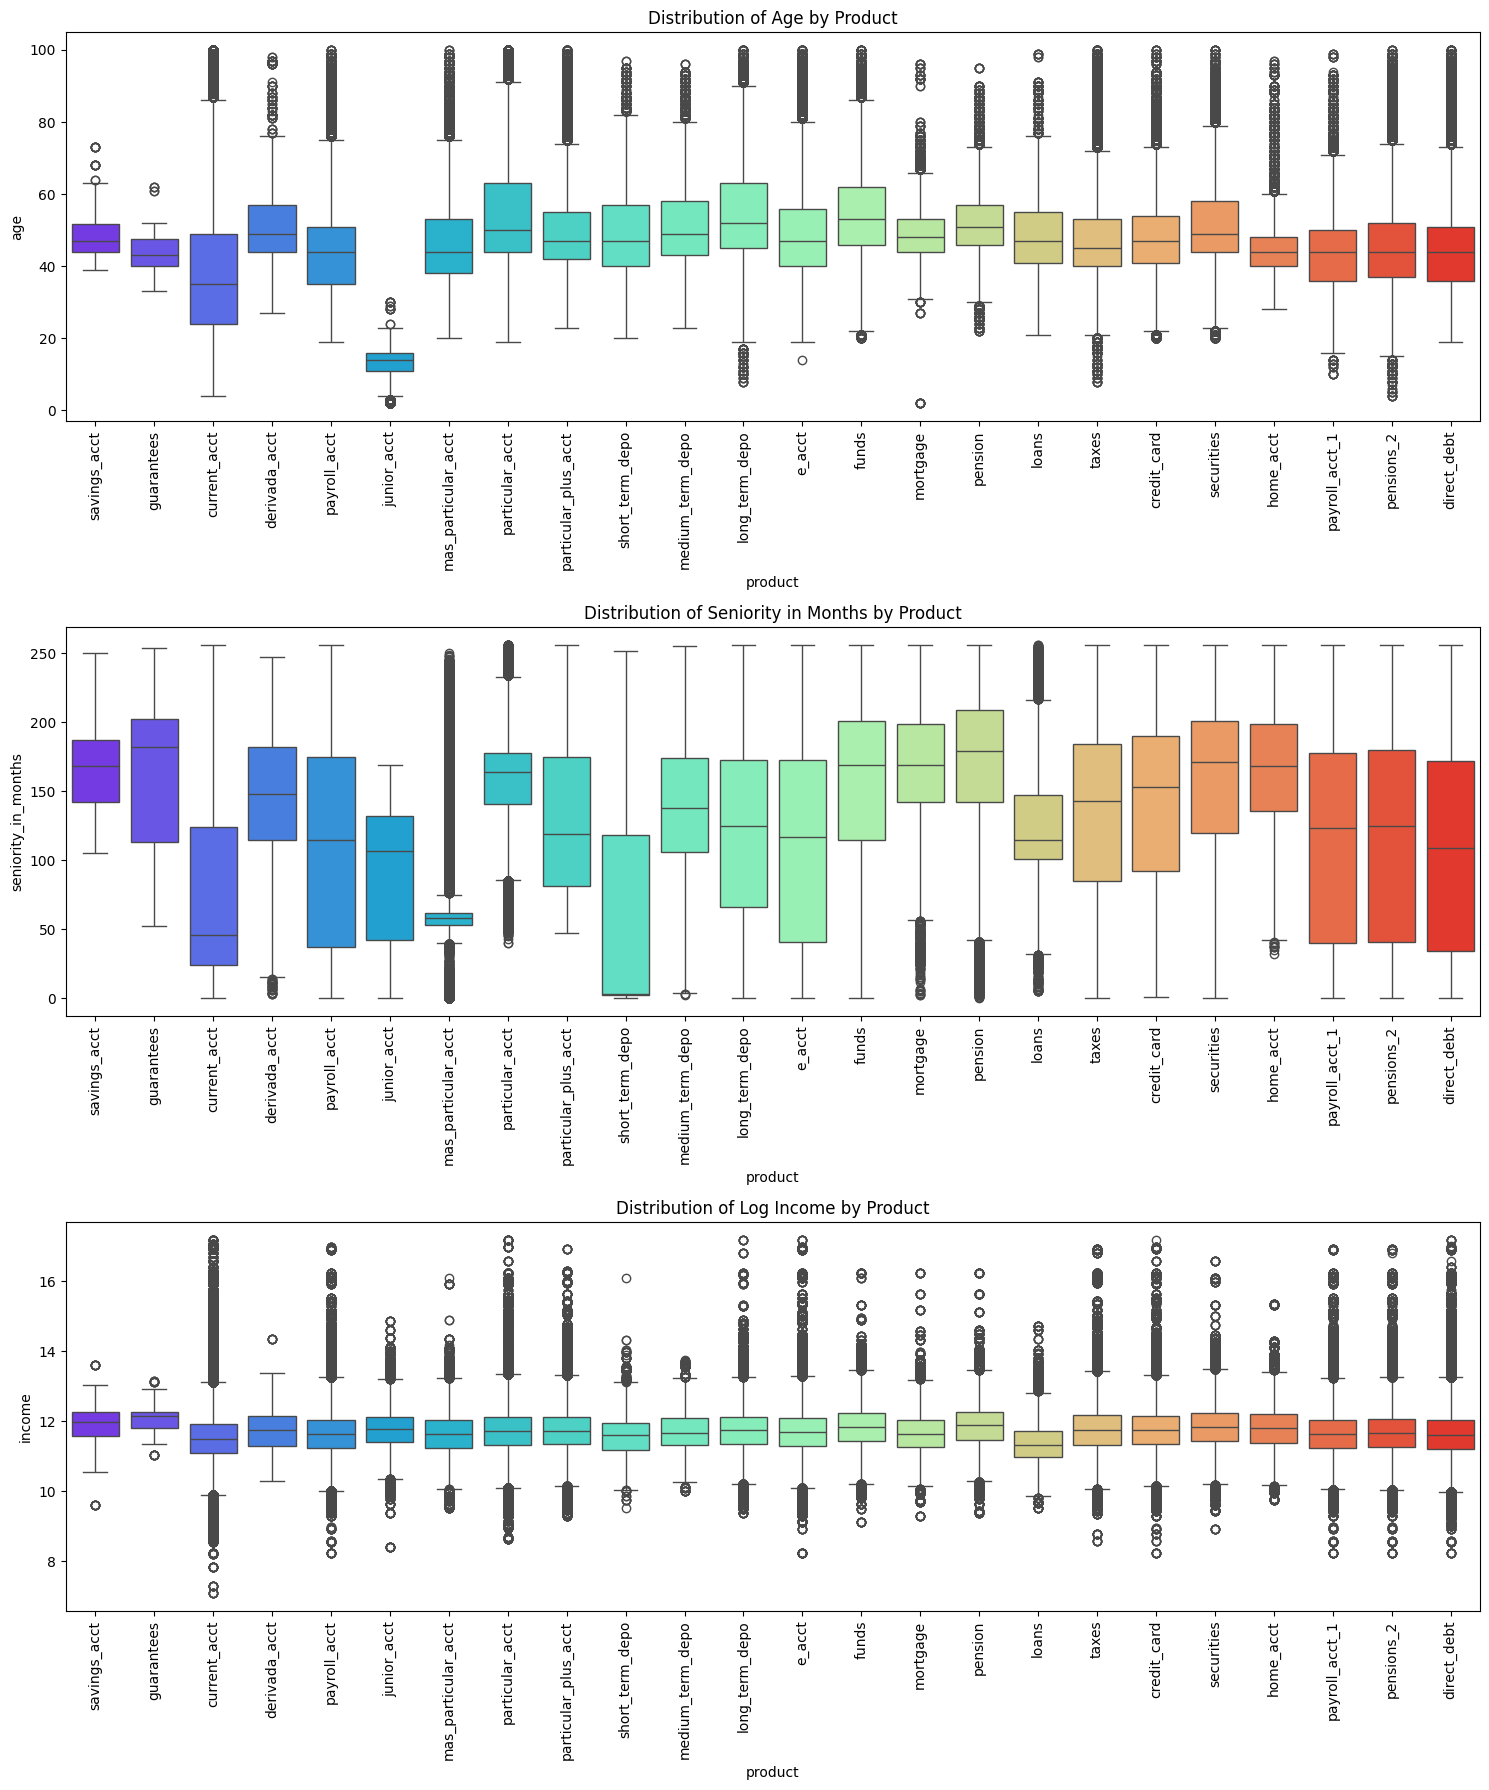

In [72]:
plt.figure(figsize=(15, 18))

# Plot for Age
plt.subplot(3, 1, 1)
sns.boxplot(data=dummy, x='product', y='age', palette='rainbow')
plt.title('Distribution of Age by Product')
plt.xticks(rotation=90)

# Plot for Seniority in Months
plt.subplot(3, 1, 2)
sns.boxplot(data=dummy, x='product', y='seniority_in_months', palette='rainbow')
plt.title('Distribution of Seniority in Months by Product')
plt.xticks(rotation=90)

# Plot for Income
plt.subplot(3, 1, 3)
sns.boxplot(data=dummy, x='product', y='income', palette='rainbow')
plt.title('Distribution of Log Income by Product')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Income (log) Distribution')

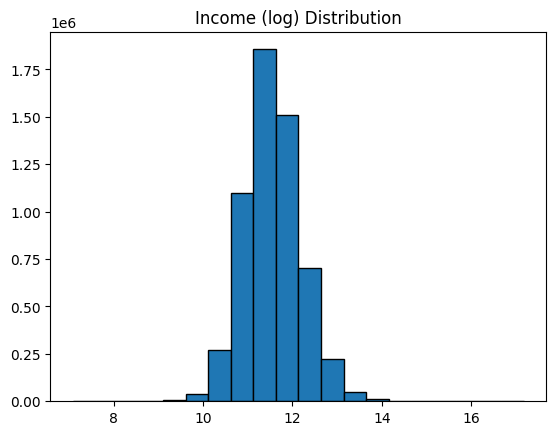

In [73]:
plt.hist(np.log(train['income']), bins=20, edgecolor='black')
plt.title('Income (log) Distribution')

Text(0.5, 1.0, 'Age Distribution')

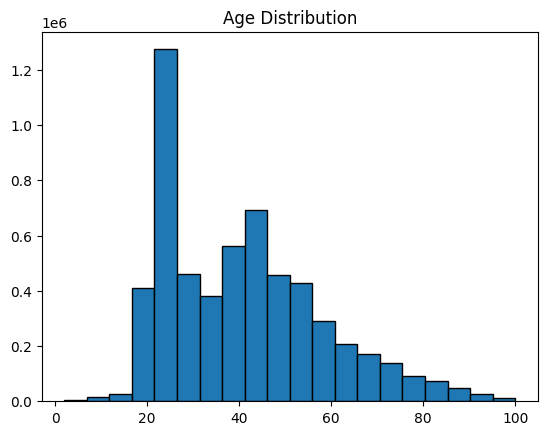

In [74]:
plt.hist(train['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')

Transform categorical variables with label encoder to plot correlation. This will not be a final transformation, it is just to detect correlation

In [75]:
le = LabelEncoder()

correlation = train.copy()
correlation.dtypes

date                    datetime64[ns]
customer_code                    int32
employee_index                  object
country                         object
female                          object
age                              int32
new_cust                         int32
seniority_in_months              int32
cust_type                       object
cust_relationship               object
residency_spain                 object
birth_spain                     object
join_channel                    object
province_name                   object
active_cust                      int32
income                         float64
segment                         object
savings_acct                     int32
guarantees                       int32
current_acct                     int32
derivada_acct                    int32
payroll_acct                     int32
junior_acct                      int32
mas_particular_acct              int32
particular_acct                  int32
particular_plus_acct     

In [76]:
correlation = correlation.drop(columns='age_group')

In [77]:
columns_to_encode = ['employee_index', 'country', 'female', 'cust_type', 'cust_relationship', 'residency_spain', 
                     'birth_spain', 'join_channel', 'province_name', 'segment']

for col in columns_to_encode:
    correlation[col] = le.fit_transform(correlation[col])

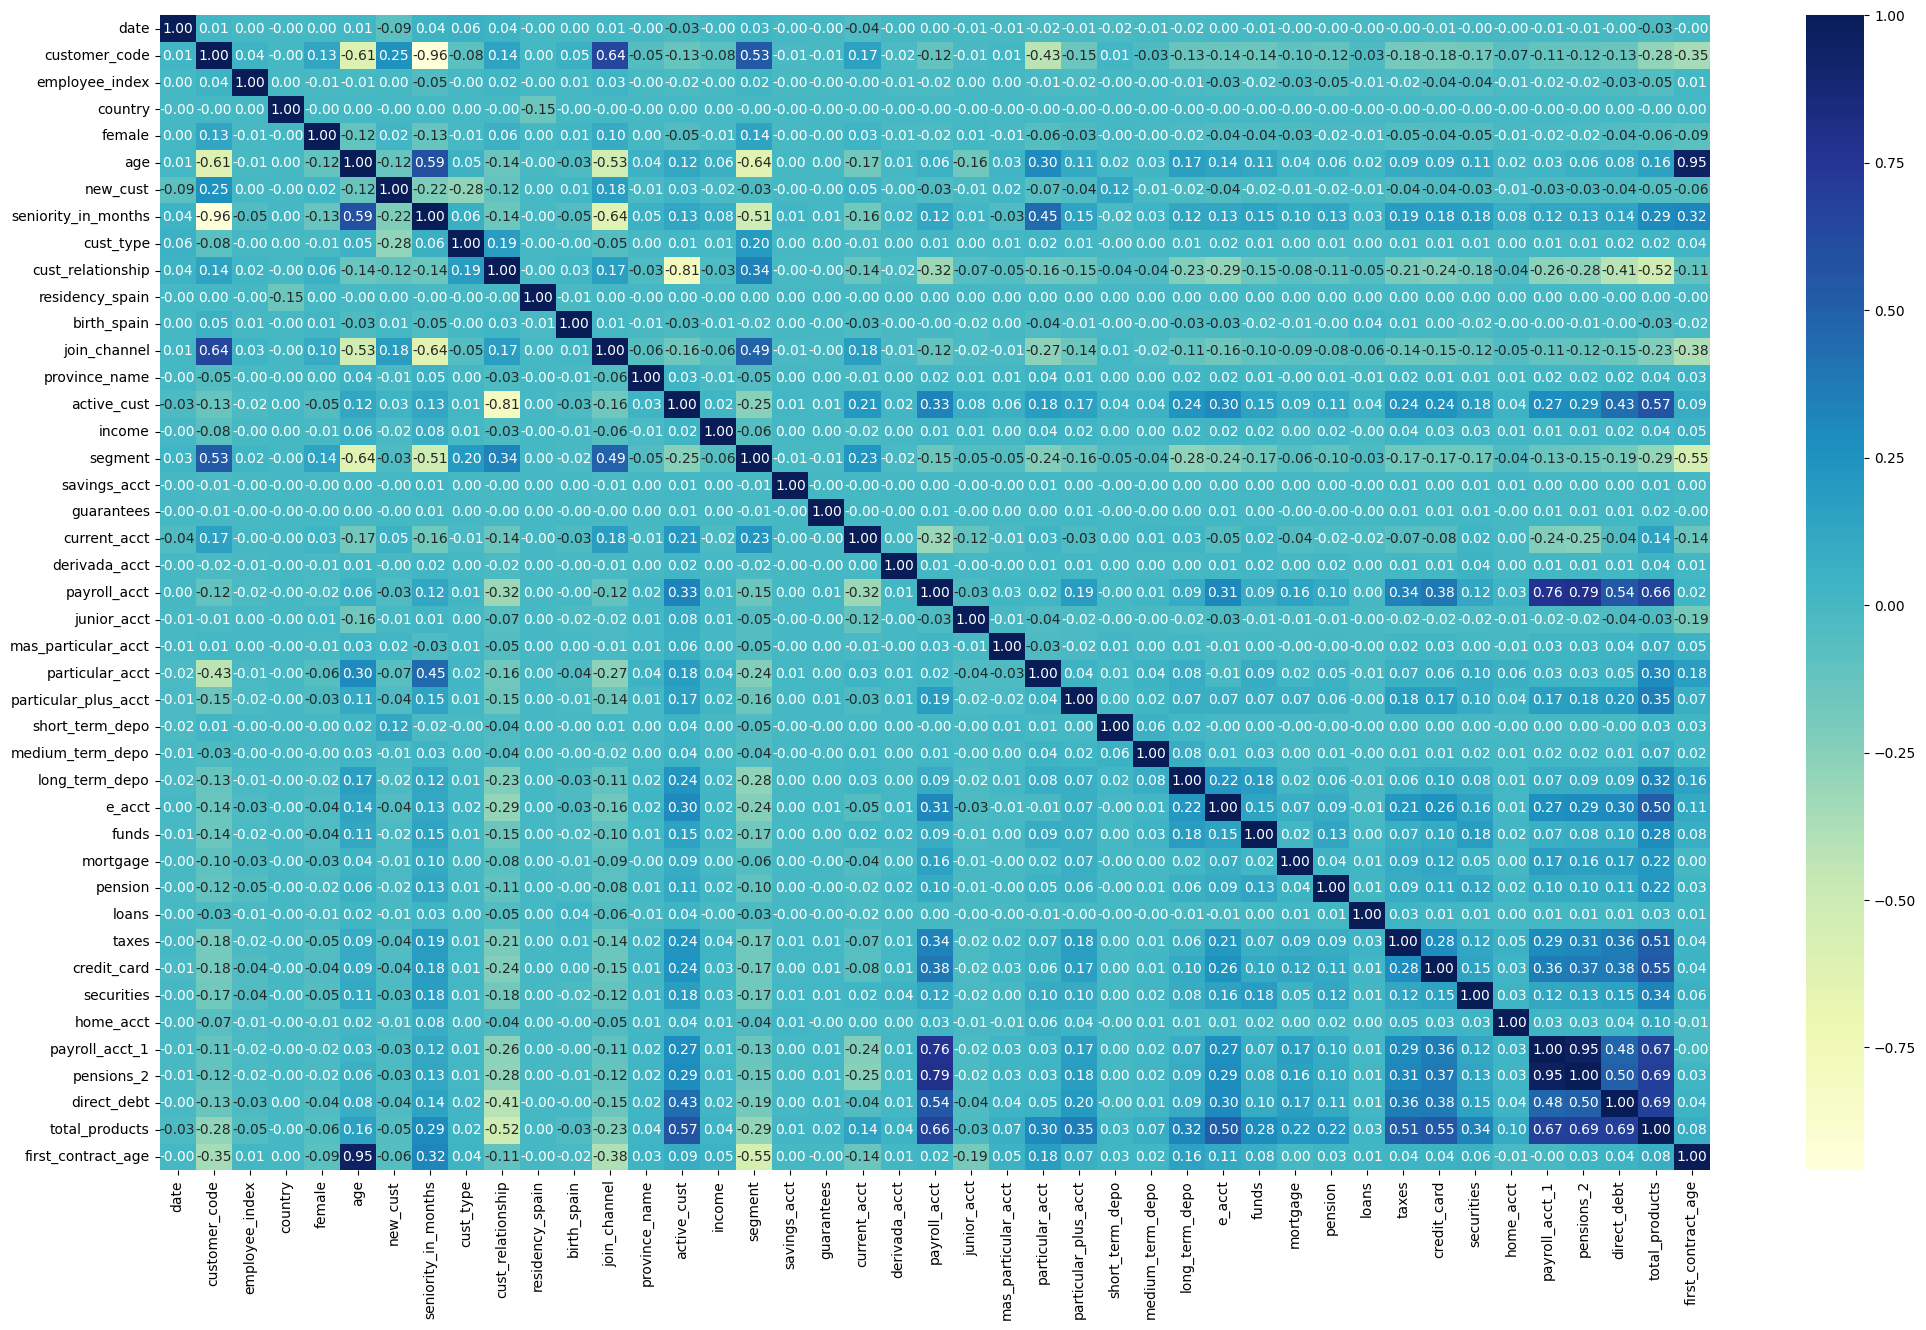

In [78]:
plt.figure(figsize=(25,15))
sns.heatmap(correlation.corr(),annot=True, cmap="YlGnBu", fmt= '.2f')
plt.show()

There are two correlations that draw attention to us. The first one is active_cust and cust_relationship, which is 0.81. The second one is payroll_acct and payroll_acct.1 which is 0.79, payroll_acct.1 and pensions_2, which is 0.95. payroll_acct.1 and cust_relationship will both be dropped, we believe that having such a high correlation would hinder our model

## Dealing with the categorical values  
Since most of the data is from clients that comes from Spain, we will combine non-spanish clients into an "others" group so we will have only two variables: ES and others. After that we will transform the column in a dummy variable for Spain.

In [79]:
train['country'] = np.where(train['country'] == 'ES', 1, 0)
test_set['country'] = np.where(test_set['country'] == 'ES', 1, 0)
val_set['country'] = np.where(val_set['country'] == 'ES', 1, 0)

We will transform the segment column using get_dummies to create two different binary columns for the variables

In [80]:
segment_dummy = pd.get_dummies(train['segment'],drop_first=True)
train = pd.concat([train, segment_dummy], axis=1)

segment_dummy_test = pd.get_dummies(test_set['segment'],drop_first=True)
test_set = pd.concat([test_set, segment_dummy_test], axis=1)

segment_dummy_val = pd.get_dummies(val_set['segment'],drop_first=True)
val_set = pd.concat([val_set, segment_dummy_val], axis=1)

Since total_products is a continuous variable representing how many products each customer has purchased, we will use it as a target for encoding the categorical variables join_channel and province_name, since those have many different variables. We chose target encoding because we would have a dimensionality problem if we chose to transform each variable in a dummy column, and we did not want to use label encoder since it is not an ordinal variable

In [81]:
target_encoder = ce.TargetEncoder(cols=['join_channel', 'province_name', 'employee_index'])

train[['join_channel_encoded', 'province_name_encoded', 'employee_index_encoded']] = target_encoder.fit_transform(
    train[['join_channel', 'province_name', 'employee_index']], train['total_products'])

# Apply the same transformation to the test and validation set (use transform, not fit_transform)
test_set[['join_channel_encoded', 'province_name_encoded', 'employee_index_encoded']] = target_encoder.transform(
    test_set[['join_channel', 'province_name', 'employee_index']])

val_set[['join_channel_encoded', 'province_name_encoded', 'employee_index_encoded']] = target_encoder.transform(
    val_set[['join_channel', 'province_name', 'employee_index']])

# You can now inspect the transformed columns in test and val_set
print(test_set[['join_channel', 'province_name', 'join_channel_encoded', 'province_name_encoded', 'employee_index_encoded']].head())
print(val_set[['join_channel', 'province_name', 'join_channel_encoded', 'province_name_encoded', 'employee_index_encoded']].head())
print(train[['join_channel', 'province_name', 'join_channel_encoded', 'province_name_encoded', 'employee_index_encoded']].head())

       join_channel province_name  join_channel_encoded  \
70935           KAT     TARRAGONA              1.979619   
90608           KHE     CORUÑA, A              0.896362   
286157          KHK        MALAGA              1.168018   
361018          KHQ        BURGOS              0.865978   
13108           KHE     CASTELLON              0.896362   

        province_name_encoded  employee_index_encoded  
70935                1.197766                1.433474  
90608                1.151160                1.433474  
286157               1.300722                1.433474  
361018               1.249856                1.433474  
13108                1.242228                1.433474  
       join_channel province_name  join_channel_encoded  \
218355          KAF       SEVILLA              2.026174   
255866          KAT        MADRID              1.979619   
117532          KHE      ZARAGOZA              0.896362   
280037          KAT        MADRID              1.979619   
19770         

In [82]:
train['cust_type'] = train['cust_type'].replace({"P": 5})
train['cust_type'] = train['cust_type'].astype(int)

test_set['cust_type'] = test_set['cust_type'].replace({"P": 5})
test_set['cust_type'] = test_set['cust_type'].astype(int)

val_set['cust_type'] = val_set['cust_type'].replace({"P": 5})
val_set['cust_type'] = val_set['cust_type'].astype(int)

Normalization/Standartization of data  
We will normalize data for age and seniority in months since it is not normally distributed  
We will standardize income since its log is normally distributed 

In [83]:
# Normalize using MinMaxScaler on training data
cols_to_normalize = ['age', 'seniority_in_months']
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
train[cols_to_normalize] = min_max_scaler.fit_transform(train[cols_to_normalize])
# Apply the fitted MinMaxScaler to test and validation sets
test_set[cols_to_normalize] = min_max_scaler.transform(test_set[cols_to_normalize])
val_set[cols_to_normalize] = min_max_scaler.transform(val_set[cols_to_normalize])

# Standardize using StandardScaler on training data
cols_to_standardize = ['income']
standard_scaler = StandardScaler()
train[cols_to_standardize] = standard_scaler.fit_transform(train[cols_to_standardize])
# Apply the fitted StandardScaler to test and validation sets
test_set[cols_to_standardize] = standard_scaler.transform(test_set[cols_to_standardize])
val_set[cols_to_standardize] = standard_scaler.transform(val_set[cols_to_standardize])

# Output results to verify
print("Training data (normalized):\n", train[cols_to_normalize].head())
print("Training data (standardized):\n", train[cols_to_standardize].head())

print("Test data (normalized):\n", test_set[cols_to_normalize].head())
print("Test data (standardized):\n", test_set[cols_to_standardize].head())

print("Validation data (normalized):\n", val_set[cols_to_normalize].head())
print("Validation data (standardized):\n", val_set[cols_to_standardize].head())


Training data (normalized):
              age  seniority_in_months
207640  0.234694             0.070312
116039  0.234694             0.140625
300836  0.306122             0.300781
361717  0.489796             0.644531
102962  0.224490             0.210938
Training data (standardized):
           income
207640  2.498775
116039 -0.208421
300836 -0.292548
361717 -0.209325
102962  0.419622
Test data (normalized):
              age  seniority_in_months
70935   0.734694             0.785156
90608   0.214286             0.113281
286157  0.244898             0.011719
361018  0.183673             0.023438
13108   0.234694             0.156250
Test data (standardized):
           income
70935  -0.374282
90608  -0.171172
286157 -0.358730
361018 -0.094848
13108  -0.354137
Validation data (normalized):
              age  seniority_in_months
218355  0.418367             0.527344
255866  0.377551             0.484375
117532  0.234694             0.199219
280037  0.755102             0.902344
19770  

# Feature Engineering

In [84]:
# Convert all boolean columns (True/False) to integers (1/0)
train = train.map(lambda x: int(x) if isinstance(x, bool) else x)

In [85]:
test_set = test_set.map(lambda x: int(x) if isinstance(x, bool) else x)

In [86]:
val_set = val_set.map(lambda x: int(x) if isinstance(x, bool) else x)

In [87]:
# Display the first few rows to check the changes
print(train.head())
print(test_set.head())
print(val_set.head())

             date  customer_code employee_index  country female       age  \
207640 2016-04-28        1334092              N        1      0  0.234694   
116039 2015-07-28        1024586              N        1      0  0.234694   
300836 2016-04-28         856204              N        1      0  0.306122   
361717 2015-08-28         295807              N        1      0  0.489796   
102962 2016-03-28         942624              N        1      1  0.224490   

        new_cust  seniority_in_months  cust_type cust_relationship  \
207640         0             0.070312          1                 I   
116039         0             0.140625          1                 A   
300836         0             0.300781          1                 I   
361717         0             0.644531          1                 A   
102962         0             0.210938          1                 I   

       residency_spain birth_spain join_channel province_name  active_cust  \
207640               1           0    

In [88]:
train = train.rename(columns={'country': 'country_spain'})
test_set = test_set.rename(columns={'country': 'country_spain'})
val_set = val_set.rename(columns={'country': 'country_spain'})

In [89]:
print(train.shape)
print(train.columns)
print(test_set.shape)
print(test_set.columns)
print(val_set.shape)
print(val_set.columns)

(5772084, 50)
Index(['date', 'customer_code', 'employee_index', 'country_spain', 'female',
       'age', 'new_cust', 'seniority_in_months', 'cust_type',
       'cust_relationship', 'residency_spain', 'birth_spain', 'join_channel',
       'province_name', 'active_cust', 'income', 'segment', 'savings_acct',
       'guarantees', 'current_acct', 'derivada_acct', 'payroll_acct',
       'junior_acct', 'mas_particular_acct', 'particular_acct',
       'particular_plus_acct', 'short_term_depo', 'medium_term_depo',
       'long_term_depo', 'e_acct', 'funds', 'mortgage', 'pension', 'loans',
       'taxes', 'credit_card', 'securities', 'home_acct', 'payroll_acct_1',
       'pensions_2', 'direct_debt', 'total_products', 'age_group',
       'first_contract_age', '01 - TOP', '02 - PARTICULARES',
       '03 - UNIVERSITARIO', 'join_channel_encoded', 'province_name_encoded',
       'employee_index_encoded'],
      dtype='object')
(1236744, 49)
Index(['date', 'customer_code', 'employee_index', 'country_s